In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

Using TensorFlow backend.






58892288/58889256 [==============================] - 1s 0us/step








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


(512, 512, 3)
[[[251. 251. 251.]
  [251. 251. 251.]
  [252. 252. 252.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [252. 252. 252.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [252. 252. 252.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]
  ...
  [255. 255. 255.]
  [254. 254. 254.]
  [255. 255. 255.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [251. 251. 251.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [251. 251. 251.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


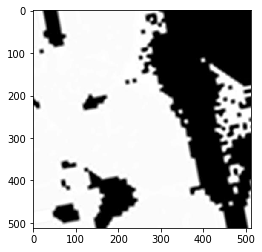

In [ ]:
# have a look at the data
import cv2
from keras.preprocessing import image
# sample = random.choice(filenames)
img = cv2.imread("/content/drive/My Drive/LUNG CANCER DETECTION/Patch_old/train/aug_class0/image_0_1004.jpeg") #here img is numpy array
dimensions = img.shape
print(dimensions) 
plt.imshow(img)

print(image.img_to_array(img))

In [ ]:
# put right dir of train & test
train_path = '/content/drive/My Drive/LUNG CANCER DETECTION/Patch_old/train'
valid_path = '/content/drive/My Drive/LUNG CANCER DETECTION/Patch_old/test'


In [ ]:
# train size
print(train_path)

#test size
print(test_path)

In [ ]:
# useful for getting number of classes
folders = glob('/content/drive/My Drive/LUNG CANCER DETECTION/Patch_old/train/*')
  

# our layers - can be added more if needed
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/LUNG CANCER DETECTION/Patch_old/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/LUNG CANCER DETECTION/Patch_old/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1897 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60/60 [==============================] - 1104s 18s/step - loss: 0.6778 - acc: 0.6773 - val_loss: 0.5289 - val_acc: 0.7381
Epoch 2/5
60/60 [==============================] - 1088s 18s/step - loss: 0.3852 - acc: 0.8117 - val_loss: 0.3847 - val_acc: 0.7952
Epoch 3/5
60/60 [==============================] - 1087s 18s/step - loss: 0.3333 - acc: 0.8377 - val_loss: 0.3491 - val_acc: 0.8333
Epoch 4/5
60/60 [==============================] - 1089s 18s/step - loss: 0.2882 - acc: 0.8687 - val_loss: 0.2794 - val_acc: 0.8810
Epoch 5/5
60/60 [==============================] - 1087s 18s/step - loss: 0.2478 - acc: 0.8890 - val_loss: 0.2952 - val_acc: 0.8476


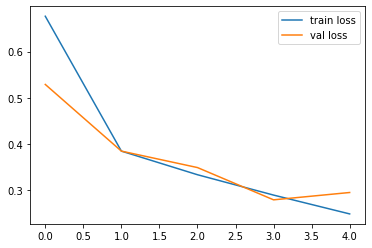

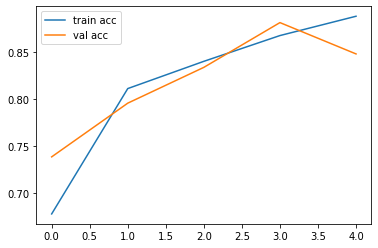

<Figure size 432x288 with 0 Axes>

In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')